In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd
from shapely.geometry import Point
import fiona
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def dt_column(name):
    a = [int(i) for i in name]
    myarray = np.asarray(a)
    a = (myarray*100+20000001).tolist()
    a = [str(i) for i in a]
    a = pd.to_datetime(a)
    return a

In [4]:
#read zipcode shape file, define a constant crs
zipcode = gpd.read_file('ZIP_CODE/ZIP_CODE_040114.shp')
zipcode = zipcode[['ZIPCODE','geometry','POPULATION','AREA']]
zipcode = zipcode.to_crs(epsg=4326)
crs = {'init' :'epsg:4326'}

In [5]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)

In [6]:
#read zipcode shape file, define a constant crs
taxi_zones = gpd.read_file('taxi_zones/taxi_zones.shp')
taxi_zones = taxi_zones[['Shape_Area', 'zone', 'LocationID', 'geometry']]
taxi_zones = taxi_zones.to_crs(epsg=4326)
crs = {'init' :'epsg:4326'}

In [13]:
yel_m = pd.read_csv('clean_data/Yellow_taxi_data/Yellow_taxi_pick_monthly(09-17).csv')
del yel_m['Unnamed: 0']

gre_m = pd.read_csv('clean_data/Green_taxi_data/Green_taxi_pick_monthly(13-17.csv')
del gre_m['Unnamed: 0']

fhv_m = pd.read_csv('clean_data/FHV_data/fhv_pick_monthly(15-17).csv')
del fhv_m['Unnamed: 0']

sub_m = pd.read_csv('clean_data/Subway_data/subway_en_monthly(10-17)')
del sub_m['Unnamed: 0']

citi_m = pd.read_csv('clean_data/Citibike_data/citibike_pick_monthly(13-17).csv')
del citi_m['Unnamed: 0']

In [14]:
yel_ = yel_m.set_index('ZIPCODE')
yel_.columns = dt_column(yel_.columns)
yel_ = yel_.T

gre_ = gre_m.set_index('ZIPCODE')
gre_.columns = dt_column(gre_.columns)
gre_ = gre_.T

fhv_ = fhv_m.set_index('ZIPCODE')
fhv_.columns = dt_column(fhv_.columns)
fhv_ = fhv_.T

sub_ = sub_m.set_index('ZIPCODE')
sub_.columns = dt_column(sub_.columns)
sub_ = sub_.T

citi_ = citi_m.set_index('ZIPCODE')
citi_.columns = dt_column(citi_.columns)
citi_ = citi_.T

In [15]:
yel_std = (yel_ - yel_.mean()) / yel_.std()
gre_std = (gre_ - gre_.mean()) / gre_.std()
fhv_std = (fhv_ - fhv_.mean()) / fhv_.std()
sub_std = (sub_ - sub_.mean()) / sub_.std()
citi_std = (citi_ - citi_.mean()) / citi_.std()

In [16]:
yel_rmean = yel_std.rolling(center=False, window=12).mean()
gre_rmean = gre_std.rolling(center=False, window=12).mean()
fhv_rmean = fhv_std.rolling(center=False, window=12).mean()
sub_rmean = sub_std.rolling(center=False, window=12).mean()
citi_rmean = citi_std.rolling(center=False, window=12).mean()

In [18]:
yel_rmean.to_csv('clean_data/annual_dataframe/yel_rmean.csv')
gre_rmean.to_csv('clean_data/annual_dataframe/gre_rmean.csv')
fhv_rmean.to_csv('clean_data/annual_dataframe/fhv_rmean.csv')
sub_rmean.to_csv('clean_data/annual_dataframe/sub_rmean.csv')
citi_rmean.to_csv('clean_data/annual_dataframe/citi_rmean.csv')

Text(0.5,0,'month')

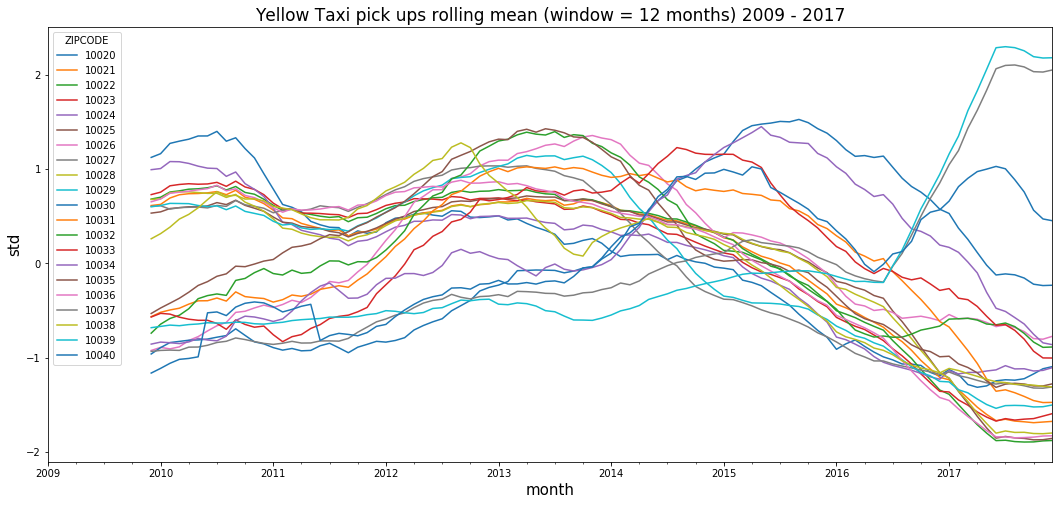

In [89]:
yel_rmean.iloc[:,18:39].plot(legend=True, figsize=(18,8))
plt.title('Yellow Taxi pick ups rolling mean (window = 12 months) 2009 - 2017',fontsize = 17)
plt.ylabel('std',fontsize = 15)
plt.xlabel('month',fontsize = 15)

Text(0.5,0,'month')

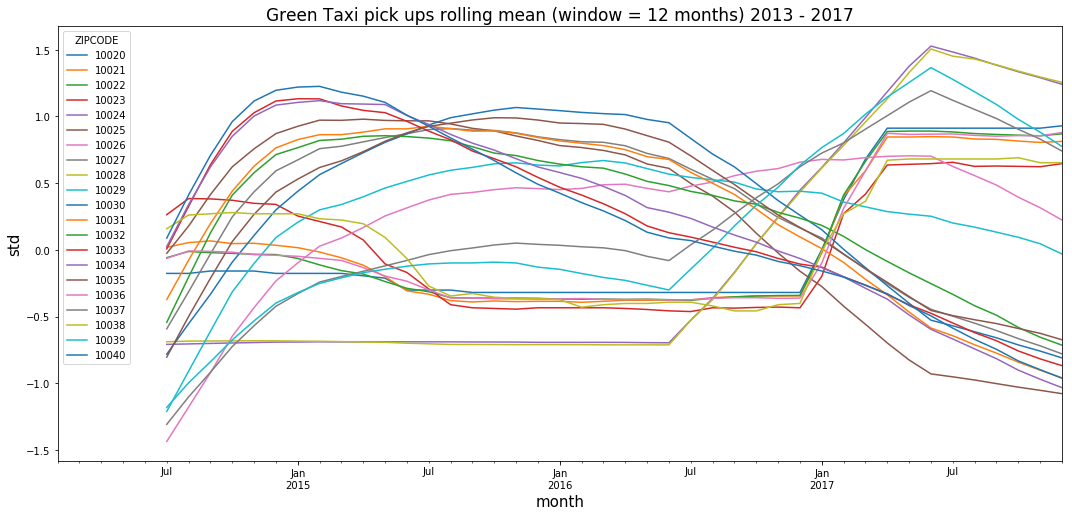

In [90]:
gre_rmean.iloc[6:,18:39].plot(legend=True, figsize=(18,8))
plt.title('Green Taxi pick ups rolling mean (window = 12 months) 2013 - 2017',fontsize = 17)
plt.ylabel('std',fontsize = 15)
plt.xlabel('month',fontsize = 15)

Text(0.5,0,'month')

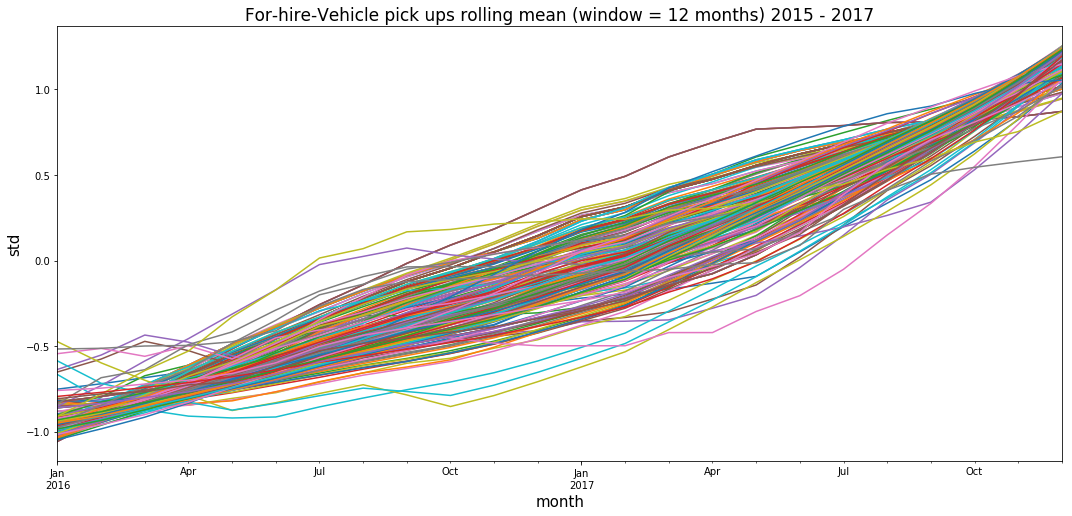

In [85]:
fhv_rmean.iloc[12:,:].plot(legend=False, figsize=(18,8))
plt.title('For-hire-Vehicle pick ups rolling mean (window = 12 months) 2015 - 2017',fontsize = 17)
plt.ylabel('std',fontsize = 15)
plt.xlabel('month',fontsize = 15)

Text(0.5,0,'month')

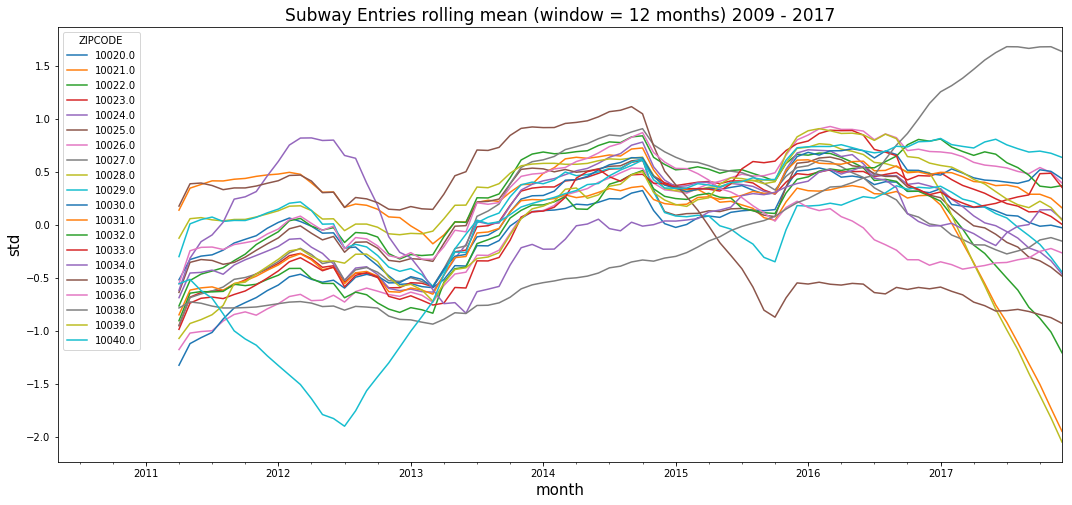

In [86]:
sub_rmean.iloc[:,18:38].plot(legend=True, figsize=(18,8))
plt.title('Subway Entries rolling mean (window = 12 months) 2009 - 2017',fontsize = 17)
plt.ylabel('std',fontsize = 15)
plt.xlabel('month',fontsize = 15)

Text(0.5,0,'month')

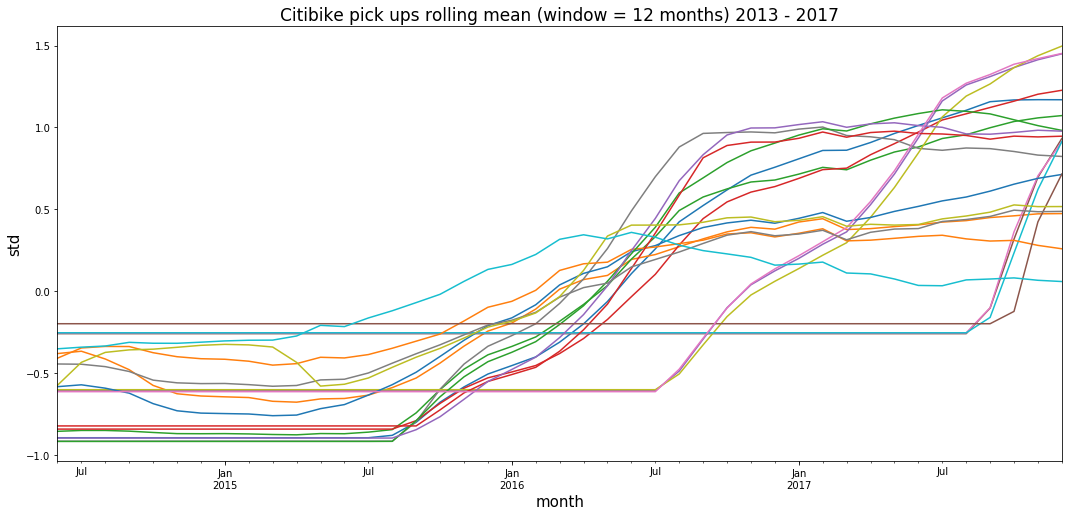

In [87]:
citi_rmean.iloc[12:,18:38].plot(legend=False, figsize=(18,8))
plt.title('Citibike pick ups rolling mean (window = 12 months) 2013 - 2017',fontsize = 17)
plt.ylabel('std',fontsize = 15)
plt.xlabel('month',fontsize = 15)